In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\Sakeeb\Desktop\assessment\books_dataset.xlsx")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         3 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB
None


In [2]:
df = df.dropna()
df = df.drop_duplicates()

In [7]:
print(df.describe())

             bookID  ratings_count  text_reviews_count
count      3.000000       3.000000            3.000000
mean   24643.666667     263.666667           21.333333
std     9247.788402     188.155078           19.425070
min    16914.000000      49.000000            0.000000
25%    19521.000000     195.500000           13.000000
50%    22128.000000     342.000000           26.000000
75%    28508.500000     371.000000           32.000000
max    34889.000000     400.000000           38.000000


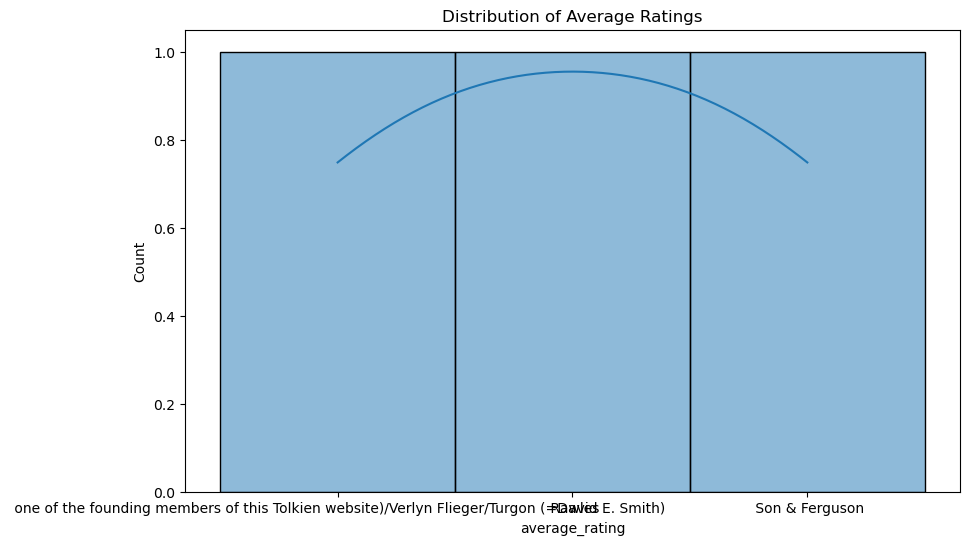

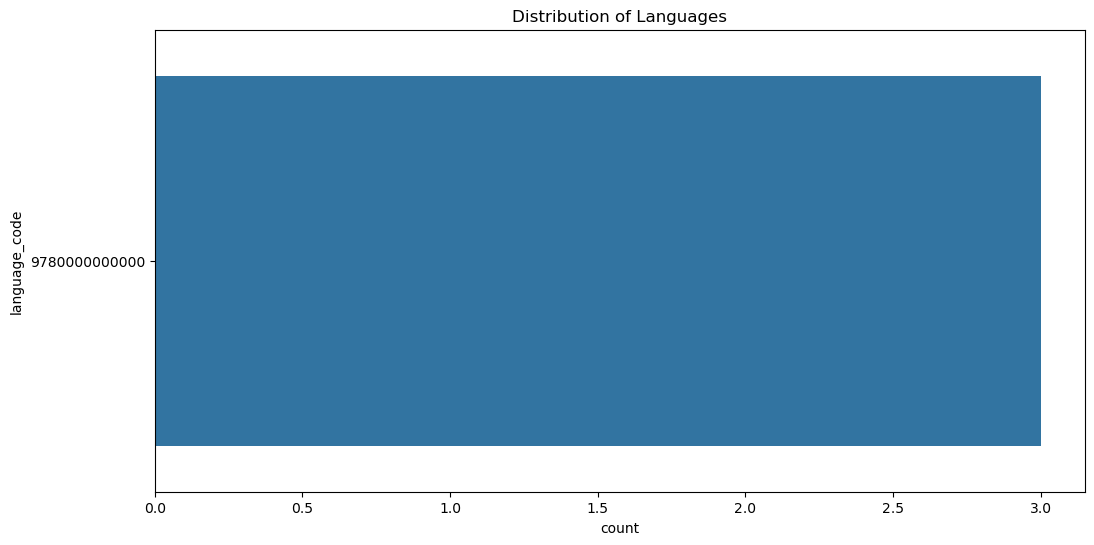

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='language_code', data=df, order=df['language_code'].value_counts().index)
plt.title('Distribution of Languages')
plt.show()

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df = pd.read_excel('books_dataset.xlsx')

df['title'] = df['title'].astype(str)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title'].fillna(''))

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(book_title, cosine_sim=cosine_similarities):
    matching_titles = df[df['title'].str.contains(book_title, case=False)]['title']

    if len(matching_titles) == 0:
        print(f"No matches found for '{book_title}'")
        return

    book_index = matching_titles.index[0]
    sim_scores = list(enumerate(cosine_sim[book_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  
    book_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[book_indices]


user_input = input("Enter the book title: ")
selected_book = user_input.strip()

recommendations = get_recommendations(selected_book)

if recommendations is not None:
    recommended_books_df = df.loc[df['title'].isin(recommendations), ['title', 'authors', 'average_rating']]
  
    print(f"Recommended books for '{selected_book}':")
    print(recommended_books_df.to_markdown(index=False))


Enter the book title: The Tolkien Fan's Medieval Reader
Recommended books for 'The Tolkien Fan's Medieval Reader':
| title                                                            | authors                                               |   average_rating |
|:-----------------------------------------------------------------|:------------------------------------------------------|-----------------:|
| Snow Flower and the Secret Fan                                   | Lisa See                                              |             4.07 |
| The Letters of J.R.R. Tolkien                                    | J.R.R. Tolkien/Humphrey Carpenter/Christopher Tolkien |             4.15 |
| J.R.R. Tolkien: A Biography                                      | Humphrey Carpenter                                    |             4.08 |
| The Tolkien Reader                                               | J.R.R. Tolkien/Peter S. Beagle                        |             3.99 |
| Pictures by J.R.R. 